In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy import stats

from scipy.optimize import minimize
import statsmodels.api as sm

import statsmodels.api as sm
import statsmodels.formula.api as smf

import urllib
import json
import os
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

#### Download data

In [4]:
url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs&exportFormat=csv"
path = os.getenv("PUIDATA")
filename = os.path.join(path, "firearm.csv")
urllib.request.urlretrieve(url, filename)

('/nfshome/var287/PUIdata/firearm.csv',
 <http.client.HTTPMessage at 0x7f64426f7f60>)

In [11]:
url = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"
path = os.getenv("PUIDATA")
filename = os.path.join(path, "gunmass.csv")
urllib.request.urlretrieve(url, filename)

('/nfshome/var287/PUIdata/gunmass.csv',
 <email.message.Message at 0x7fdd24b97048>)

In [ ]:
os.system("unzip " + filename + " -d $PUIDATA")

In [36]:
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
path = os.getenv("PUIDATA")
filename = os.path.join(path, "worldpop.gz")
urllib.request.urlretrieve(url, filename)

('/nfshome/var287/PUIdata/worldpop.gz',
 <http.client.HTTPMessage at 0x7fdd24de5588>)

In [37]:
os.system("unzip " + filename + " -d $PUIDATA")

256

In [47]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
path = os.getenv("PUIDATA")
filename = os.path.join(path, "worldgdp.gz")
urllib.request.urlretrieve(url, filename)

('/nfshome/var287/PUIdata/worldgdp.gz',
 <http.client.HTTPMessage at 0x7fdd24bb6048>)

In [49]:
os.system("unzip " + filename + " -d $PUIDATA")

256

#### Load Data

In [5]:
gunmass = pd.read_csv(os.path.join(path,"gunmass.csv"))
gunmass.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
firearm = pd.read_csv(os.path.join(path,"firearm.csv"))
firearm.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [7]:
worldpop = pd.read_csv(os.path.join(path,"API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"), header=2 )
worldpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [8]:
worldgdp = pd.read_csv(os.path.join(path,"API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv"), header=2 )
worldgdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


#### Select necessary column

In [9]:
pop = worldpop[['Country Name', '2017']]
fm = firearm[['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm' ]]
gdp = worldgdp[['Country Name', '2017']]

In [10]:
pop.columns = ['Country Name', 'pop']
gdp.columns = ['Country Name', 'gdp']
fm.columns = ['Country Name', 'Average total all civilian firearms' , 'Number of homicides by firearm' ]

In [11]:
popgdp = pop.merge(gdp, on='Country Name')
popgdp.head()

,Country Name,pop,gdp
0,Aruba,105264.0,NaN
1,Afghanistan,35530081.0,2.081530e+10
2,Angola,29784193.0,1.242094e+11
3,Albania,2873457.0,1.303935e+10
4,Andorra,76965.0,3.012914e+09


In [12]:
fmpopgdp = fm.merge(popgdp, on="Country Name")
fmpopgdp.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp
0,Albania,270000.0,56.0,2873457.0,1.303935e+10
1,Algeria,1900000.0,20.0,41318142.0,1.703708e+11
2,Angola,2800000.0,NaN,29784193.0,1.242094e+11
3,Argentina,3950000.0,1198.0,44271041.0,6.375904e+11
4,Armenia,380000.0,9.0,2930450.0,1.153659e+10


#### Merge Dataframe

In [13]:
df_ = fmpopgdp.merge(gunmass, right_on="Country", left_on="Country Name")
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,3050000.0,30.0,24598933.0,1.323421e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8809212.0,4.165957e+11,Austria,30.4,1
2,Belgium,1800000.0,70.0,11372068.0,4.926813e+11,Belgium,17.2,2
3,Canada,9950000.0,173.0,36708083.0,1.653043e+12,Canada,30.8,4
4,Denmark,650000.0,15.0,5769603.0,3.248720e+11,Denmark,12.0,0


In [14]:
df_.columns = ['Country Name', 'Average total all civilian firearms',
       'Number of homicides by firearm', 'pop', 'gdp', 'Country',
       'Guns per 100 inhabitants', 'Number of mass shootings']

df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,24598933.0,1.323421e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8809212.0,4.165957e+11,Austria,30.4,1
2,Belgium,1800000.0,70.0,11372068.0,4.926813e+11,Belgium,17.2,2
3,Canada,9950000.0,173.0,36708083.0,1.653043e+12,Canada,30.8,4
4,Denmark,650000.0,15.0,5769603.0,3.248720e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


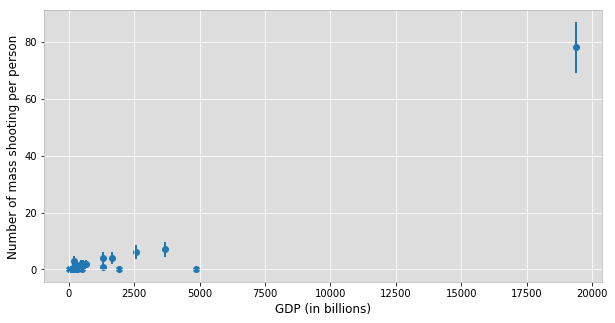

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

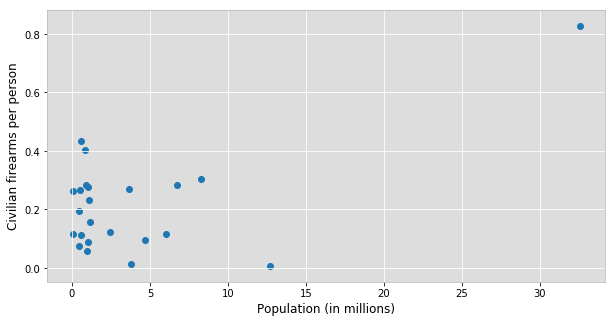

In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.scatter( df_['pop'] /  1e7 ,  df_['Average total all civilian firearms']/df_['pop'])

ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Civilian firearms per person")
pl.show()

Plot of Civilian Firearms per person vs Population. The outlier on the top right represent USA

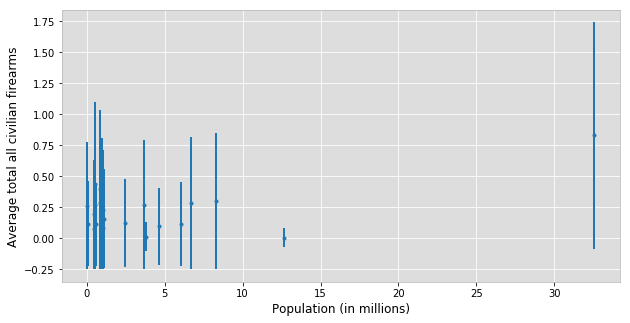

In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['pop']/  1e7,  df_['Average total all civilian firearms']/df_['pop'], s= 1)
ax.errorbar(df_['pop']/1e7, df_['Average total all civilian firearms']/df_['pop'], 
            yerr = np.sqrt(df_['Average total all civilian firearms']/df_['pop'] * 1.0), fmt = '.')

ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Average total all civilian firearms")
ax.set_xlim()
pl.show()

Error bar Plot Civilian Firearms per person vs Population. The outlier on the top right represent USA, which also has a large uncertainty.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'N')

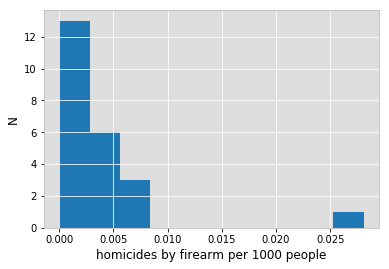

In [18]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel("N")

Histogram distibuton of homicides by firearms per 1000 people. The distribution is skewed to the right with one bar as an outlier.

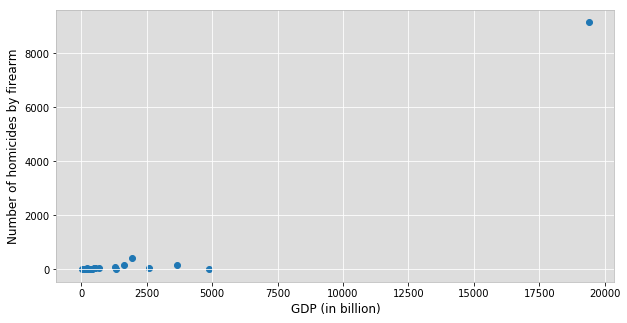

In [201]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.scatter( df_['gdp'] / 1e9,  df_['Number of homicides by firearm'])

ax.set_xlabel("GDP (in billion)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_xlim()
pl.show()

Plot of Number of Homicides by Firearm vs GDP. Generally, there not many homicides and GDP doesnt not seem to correlate with number of homicide. However, the point on the far right is USA, an outlier with high GDP and high Homicide

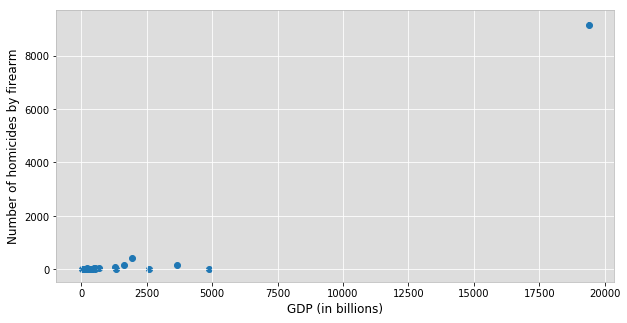

In [446]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
scatter = ax.scatter(df_['gdp'] / 1e9,  df_['Number of homicides by firearm'])
ax.errorbar(df_['gdp'] / 1e9, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.')


ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_xlim()
pl.show()

Error bar plot for Number of Homicides by firearm vs GDP. Since there doesnt seems to be a correlation, the error bar for each points are small.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [20]:
usa = df_.loc[df_['Country Name']== 'United States']
usa

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings
22,United States,270000000.0,9146.0,325719178.0,1.939060e+13,United States,88.8,78


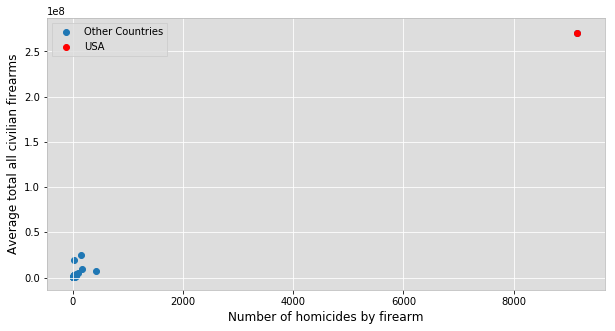

In [27]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
pl.scatter( df_['Number of homicides by firearm'] ,  df_['Average total all civilian firearms'], label = 'Other Countries')

pl.scatter( usa['Number of homicides by firearm'] ,  usa['Average total all civilian firearms'], color = 'red', label ='USA')

ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")

pl.legend()
ax.set_xlim()
pl.show()


Plot of total all civilian firearms vs number of homicides by firearm. There seems to be a weak correlation between the two variables. USA is an outlier with high number of firearms and homicide

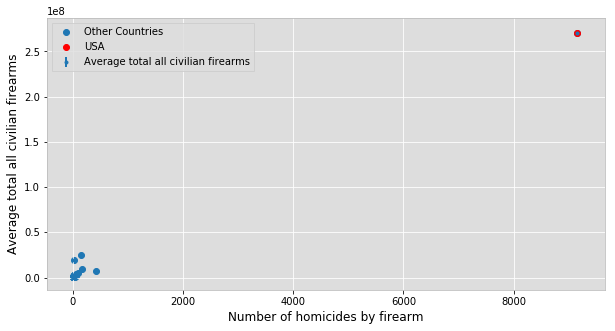

In [31]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
scatter = pl.scatter( df_['Number of homicides by firearm'] ,  df_['Average total all civilian firearms'], label = 'Other Countries')
ax.errorbar(df_['Number of homicides by firearm'], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0), fmt = '.')

pl.scatter( usa['Number of homicides by firearm'] ,  usa['Average total all civilian firearms'], color = 'red', label = 'USA' )


ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
#ax.set_xlim()
pl.legend()
pl.show()

Error plot of total all civilian firearms vs number of homicides by firearm. There seems to be a weak correlation between the two variables. USA is an outlier with high number of firearms and homicide

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


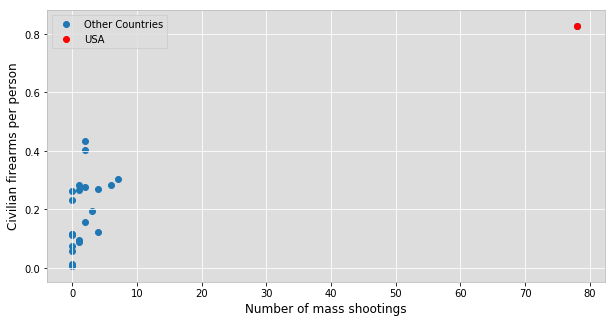

In [40]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
pl.scatter( df_['Number of mass shootings'] , df_['Average total all civilian firearms']/df_['pop'], label = 'Other Countries')
pl.scatter( usa['Number of mass shootings'] ,  usa['Average total all civilian firearms']/usa['pop'], color = 'red', label = 'USA' )

ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Civilian firearms per person")

#ax.set_xlim()
pl.legend()
pl.show()

Plot of civilian firearm per person and number of mass shooting. There seems to be a correlation between the two variables. USA stays as an outlier.

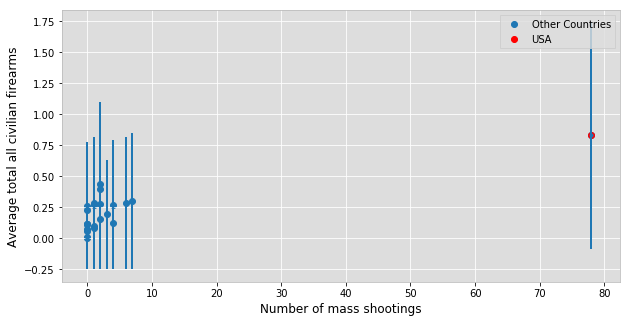

In [43]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
scatter = pl.scatter( df_['Number of mass shootings'] ,  df_['Average total all civilian firearms']/df_['pop'], label = 'Other Countries')
ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms']/df_['pop'], 
            yerr = np.sqrt(df_['Average total all civilian firearms']/df_['pop'] * 1.0), fmt = '.')
pl.scatter( usa['Number of mass shootings'] ,  usa['Average total all civilian firearms']/usa['pop'], color = 'red', label = 'USA' )

ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")

pl.legend()

pl.show()

Error bar plot of civilian firearm per person and number of mass shooting. The error bar are large which shows uncertainties with the points.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [48]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7

In [49]:
df_['firearms'] = (df_['Average total all civilian firearms'] / df_['pop'])

In [50]:
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,firearms
0,Australia,3050000.0,30.0,24598933.0,1.323421e+12,Australia,15.0,4,1.626087,0.123989
1,Austria,2500000.0,18.0,8809212.0,4.165957e+11,Austria,30.4,1,1.135175,0.283794
2,Belgium,1800000.0,70.0,11372068.0,4.926813e+11,Belgium,17.2,2,1.758695,0.158283
3,Canada,9950000.0,173.0,36708083.0,1.653043e+12,Canada,30.8,4,1.089678,0.271057
4,Denmark,650000.0,15.0,5769603.0,3.248720e+11,Denmark,12.0,0,0.000000,0.112659


In [51]:
OLSfit = smf.OLS(df_['shootingspp'], sm.add_constant(df_['firearms'])).fit()
OLSfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     5.124
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0343
Time:                        22:47:32   Log-Likelihood:                -39.068
No. Observations:                  23   AIC:                             82.14
Df Residuals:                      21   BIC:                             84.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3568      0.463      0.770      0.450        -0.606     1.320
firearms       3.7701      1.665      2.264      0.034         0.307     7.234
==============================================================================
Omnibus:                       32.830   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.798
Skew:                           2.556   Prob(JB):                     1.28e-17
Kurtosis:                      10.419   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
b0, b1 =OLSfit.params

In [53]:
w = 1 / (np.sqrt(df_['shootingspp'])+1)


#### Since there are values with 0, I add 1 to all of the square rooted of the shootingspp values. The zero values would have largest weight since it would have smallest error.

In [55]:
WLSfit = smf.WLS(df_['shootingspp'], df_['firearms'], weights= w).fit()
WLSfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.464
Model:                            WLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     19.06
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000247
Time:                        22:47:38   Log-Likelihood:                -33.555
No. Observations:                  23   AIC:                             69.11
Df Residuals:                      22   BIC:                             70.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
firearms       3.9675      0.909      4.366      0.000         2.083     5.852
==============================================================================
Omnibus:                       20.143   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.697
Skew:                           1.723   Prob(JB):                     9.67e-07
Kurtosis:                       7.126   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

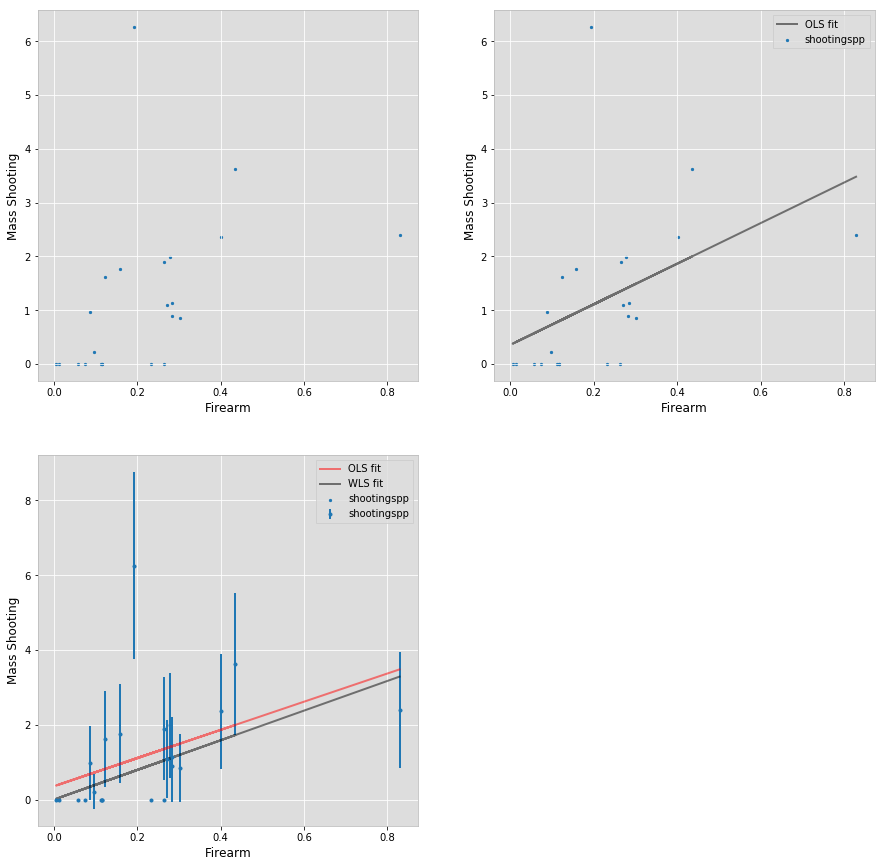

In [62]:
fig = pl.figure(figsize=(15,15)) 
ax = fig.add_subplot(221)

pl.scatter(df_['firearms'], df_['shootingspp'], s=5)

ax.set_xlabel("Firearm")
ax.set_ylabel("Mass Shooting")


ax1 = fig.add_subplot(222)
pl.scatter(df_['firearms'], df_['shootingspp'], s=5)

ax1.plot(df_['firearms'], df_['firearms']*b1+b0, color ='black', alpha = 0.5, label = 'OLS fit')

ax1.set_xlabel("Firearm")
ax1.set_ylabel("Mass Shooting")
ax1.legend()


ax2 = fig.add_subplot(223)
pl.scatter(df_['firearms'], df_['shootingspp'], s=5)

ax2.plot(df_['firearms'], df_['firearms']*b1+b0, color ='red', alpha = 0.5, label = 'OLS fit')
ax2.plot(df_['firearms'], WLSfit.predict(df_['firearms']), color ='black', alpha = 0.5, label = 'WLS fit')

ax2.errorbar(df_['firearms'], df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')

ax2.set_xlabel("Firearm")
ax2.set_ylabel("Mass Shooting")
ax2.legend()


pl.show()

Regression fit plots of Number of Mass Shooting vs Number of Firearms per person, done using OLS and WLS. Since some of the value for mass shooting is 0, weights was calculated by adding 1 to the square rooted values before inversing them, which would ensure those with 0 values and 0 errors have largest weight.

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

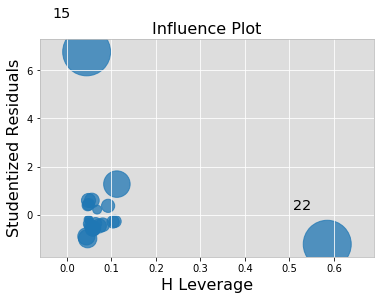

In [399]:
sm.graphics.influence_plot(OLSfit, alpha  = 0.05, criterion="cooks");

Influence plot of the OLS fit on Mass Shooting and number of Firearms, which presents the influence of outliers in the model. The plot shows that the outliers can be identified in this case as having large residual and its influence to the fit by having higher levearage. Based on the previous analysis, the outlier seems to represent USA. 

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings